In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df1 = pd.read_csv("Products.csv")
df2 = pd.read_csv("Sales.csv")
df3 = pd.read_excel("Stores.xlsx")

In [7]:
df1.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [8]:
df1.isna().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [9]:
df2.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [10]:
df2.isna().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [11]:
df2.dropna(inplace=True)

In [12]:
df2

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
5,366002,3,1/1/2016,1/12/2016,266019,0,1080,4,CAD
...,...,...,...,...,...,...,...,...,...
62878,2243029,6,2/20/2021,2/27/2021,887764,0,1456,2,EUR
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [13]:
df3.head()

,StoreKey,Country,State
0,1,Australia,Australian Capital Territory
1,2,Australia,Northern Territory
2,3,Australia,South Australia
3,4,Australia,Tasmania
4,5,Australia,Victoria


In [14]:
df3.isna().sum()

StoreKey    0
Country     0
State       0
dtype: int64

### Merge df1 and df2

In [15]:
merged_df = pd.merge(df1, df2, on='ProductKey', how='outer')

In [16]:
merged_df.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,Quantity,Currency Code
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio,493001.0,3.0,5/7/2016,5/14/2016,453993.0,0.0,1.0,EUR
1,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio,891001.0,1.0,6/9/2017,6/13/2017,741381.0,0.0,1.0,EUR
2,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio,1150002.0,2.0,2/23/2018,2/24/2018,1688921.0,0.0,2.0,USD
3,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio,1230002.0,1.0,5/14/2018,5/18/2018,318980.0,0.0,1.0,CAD
4,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio,1452032.0,1.0,12/22/2018,12/30/2018,751036.0,0.0,10.0,EUR


### Merge the result with df3

In [17]:
final_merged_df = pd.merge(merged_df, df3, on='StoreKey', how='inner')

In [18]:
final_merged_df.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,Quantity,Currency Code,Country,State
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio,493001.0,3.0,5/7/2016,5/14/2016,453993.0,0.0,1.0,EUR,Online,Online
1,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio,891001.0,1.0,6/9/2017,6/13/2017,741381.0,0.0,1.0,EUR,Online,Online
2,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio,1150002.0,2.0,2/23/2018,2/24/2018,1688921.0,0.0,2.0,USD,Online,Online
3,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio,1230002.0,1.0,5/14/2018,5/18/2018,318980.0,0.0,1.0,CAD,Online,Online
4,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio,1452032.0,1.0,12/22/2018,12/30/2018,751036.0,0.0,10.0,EUR,Online,Online


In [19]:
final_merged_df = pd.DataFrame(final_merged_df)

In [20]:
#final_merged_df 

### Distribution Analysis

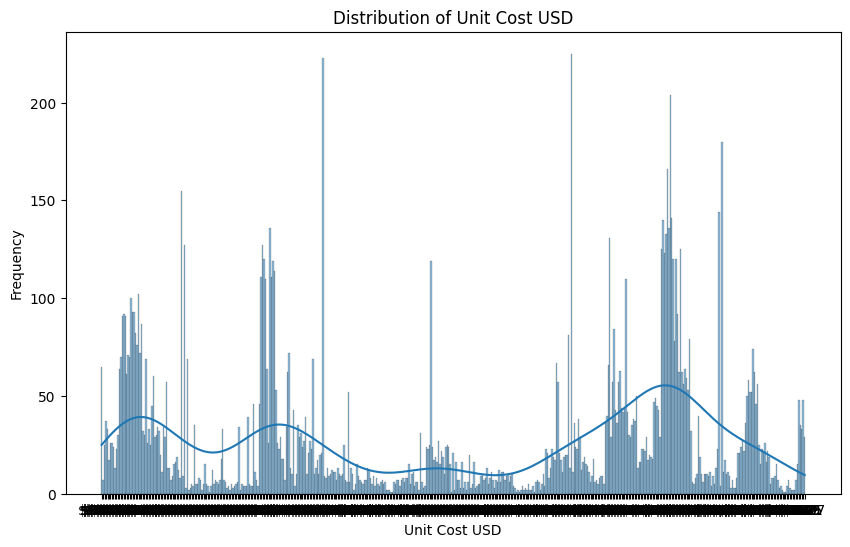

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(final_merged_df['Unit Cost USD'], kde=True)
plt.title('Distribution of Unit Cost USD')
plt.xlabel('Unit Cost USD')
plt.ylabel('Frequency')
plt.show()

### Bar chart for Product Categories

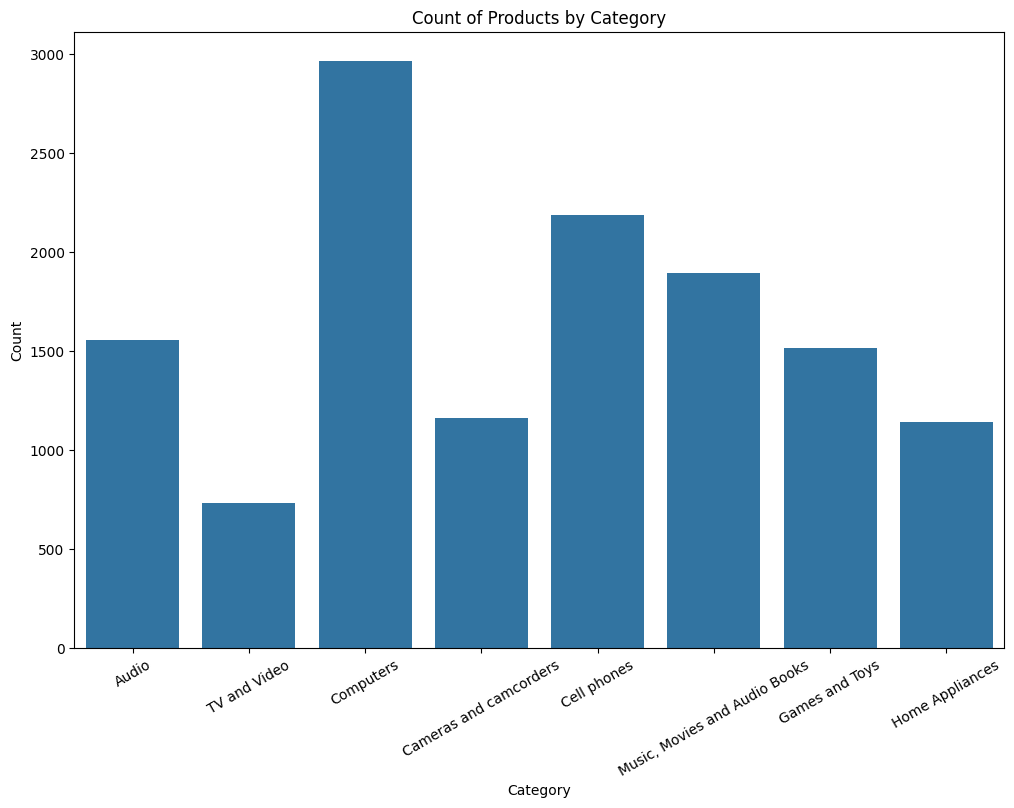

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(data=final_merged_df, x='Category')
plt.title('Count of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
xticks = plt.xticks(rotation=30)
plt.show()

### Box Plot for Unit Price by Category

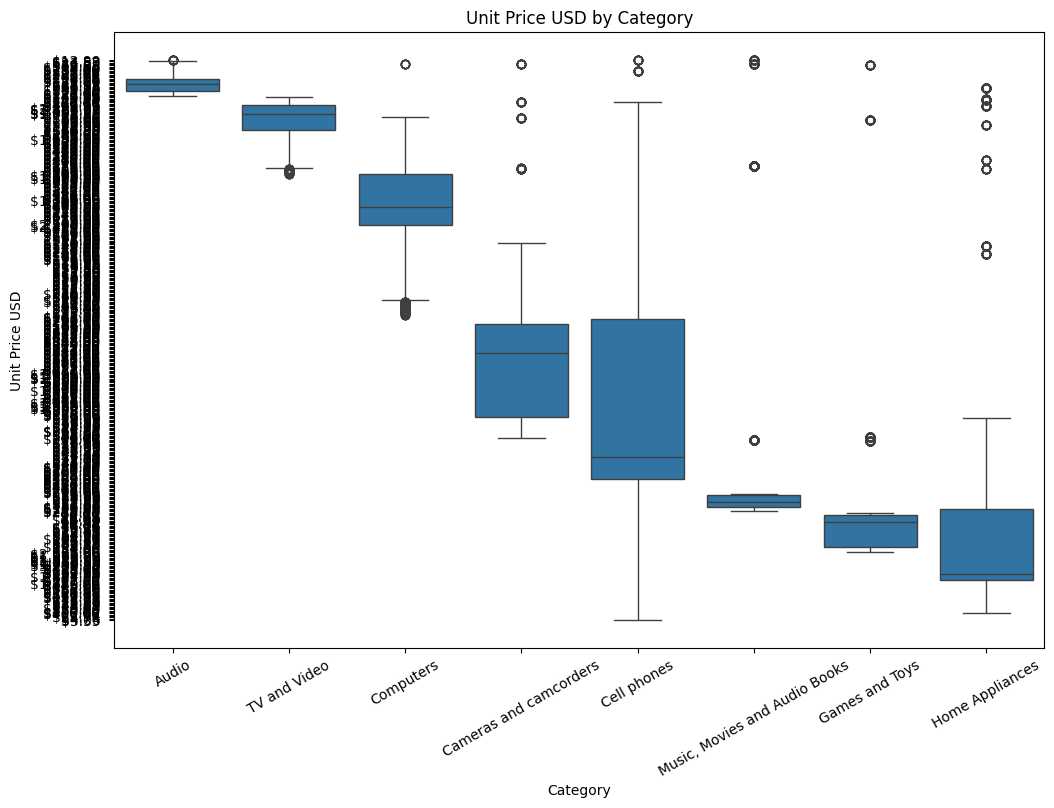

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=final_merged_df, x='Category', y='Unit Price USD')
plt.title('Unit Price USD by Category')
plt.xlabel('Category')
xticks = plt.xticks(rotation=30)
plt.ylabel('Unit Price USD')
plt.show()

### Scatter Plot for Unit Cost vs. Unit Price


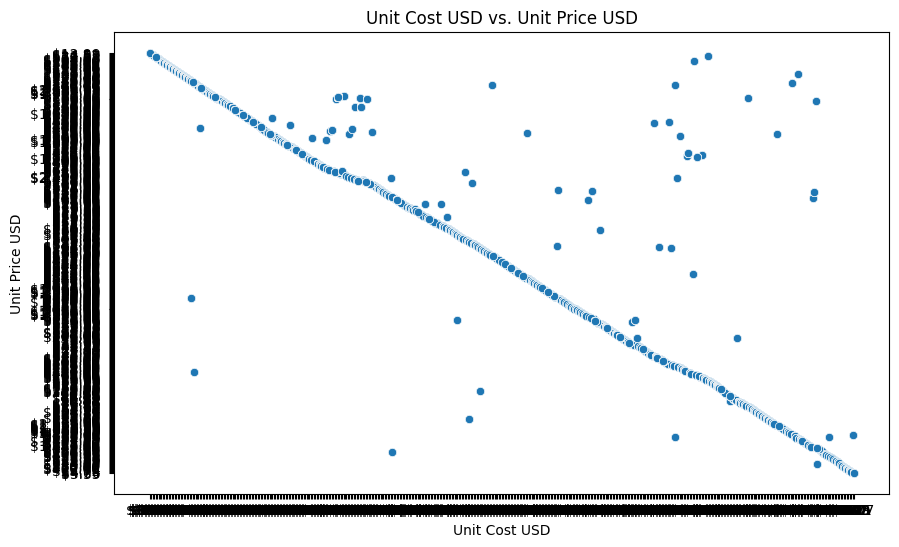

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_merged_df, x='Unit Cost USD', y='Unit Price USD')
plt.title('Unit Cost USD vs. Unit Price USD')
plt.xlabel('Unit Cost USD')
plt.ylabel('Unit Price USD')
plt.show()

In [26]:
final_merged_df= final_merged_df['Order Date'].astype('datetime64[ns]')

### Line Chart for Orders Over Time


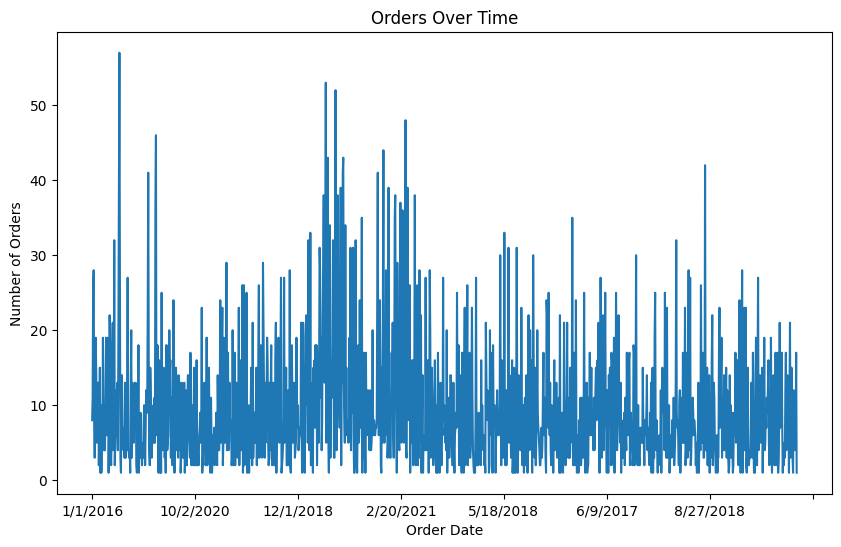

In [71]:
plt.figure(figsize=(10, 6))
orders_over_time = final_merged_df.groupby('Order Date').size()
orders_over_time.plot()
plt.title('Orders Over Time')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.show()